### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For use in creating a subplot grid
import math

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [265]:
ratings = pd.read_csv("Data.csv")
movies = pd.read_csv("item.csv")
users = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [266]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [267]:
ratings.shape

(100000, 4)

In [268]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [269]:
ratings.isnull().sum().sum()

0

In [270]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [271]:
movies.shape

(1681, 22)

In [272]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [273]:
movies.isnull().sum().sum()

0

In [274]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [275]:
users.shape

(943, 5)

In [276]:
users.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [277]:
users.isnull().sum().sum()

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [278]:
# use sum on the default axis

featuresToExclude = ['movie id', 'movie title', 'release date', 'release year']
features = [col for col in movies.columns if col not in featuresToExclude]
movies[features].sum(axis=0)

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [279]:
#hint: use sum on the axis = 1

pd.set_option('display.max_columns', None)

features = [col for col in movies.columns if col not in ['release date', 'release year']]
mov = movies[features].set_index('movie id')

mov[mov.sum(axis = 1)>1]

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,
1,Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
7,Twelve Monkeys,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,MURDER and murder,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1670,Tainted,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1673,Mirage,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [282]:
unknownGenreMovies = movies[movies['unknown'] == 1].index
movies.drop(unknownGenreMovies, inplace = True)
movies

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [19]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [20]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


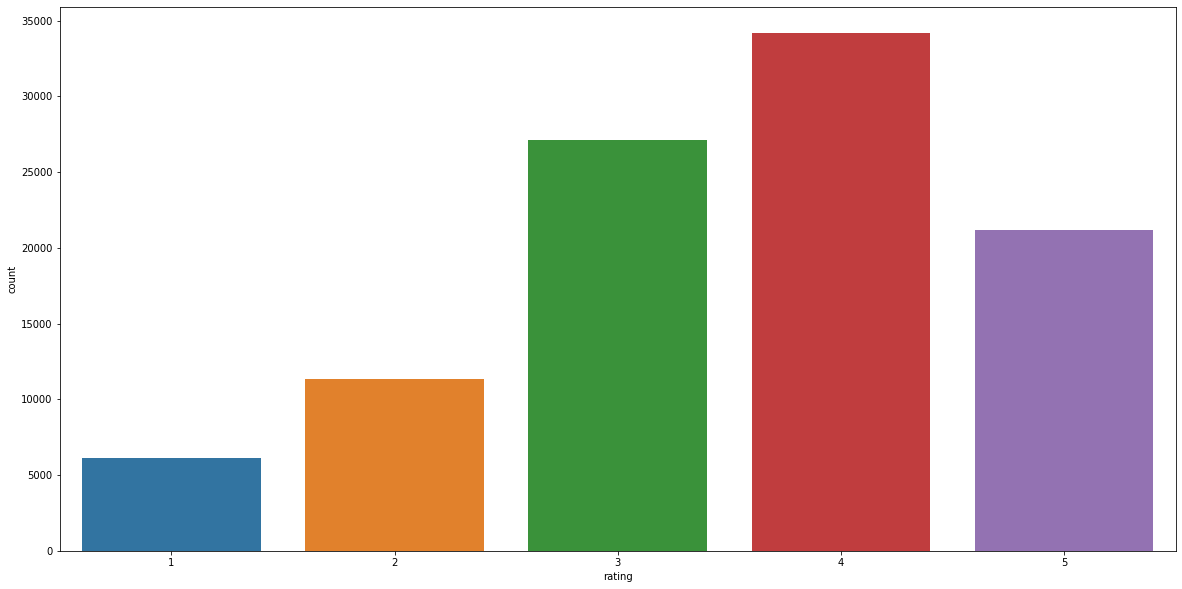

In [283]:
#your answers here
plt.rcParams['figure.figsize'] = [20, 10]

#Rating
sns.countplot(ratings.rating);

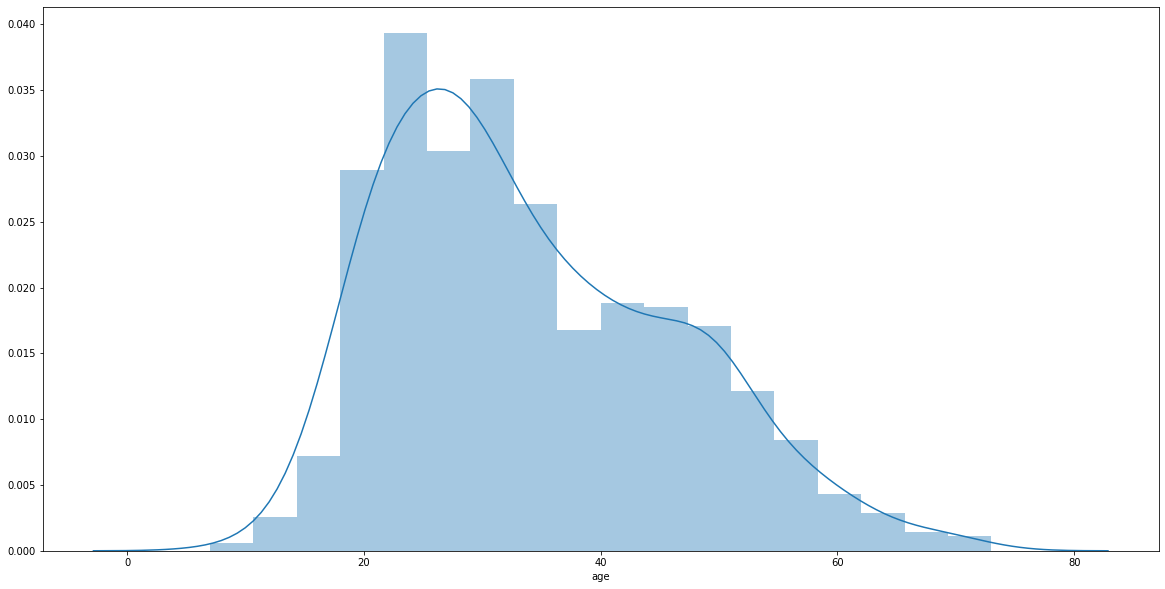

In [284]:
#Age
sns.distplot(users.age);

In [1]:
#Release year
release_year = movies['release date'].str.split('-', expand = True)[2].astype(int)
sns.distplot(release_year, kde = False);

NameError: name 'movies' is not defined

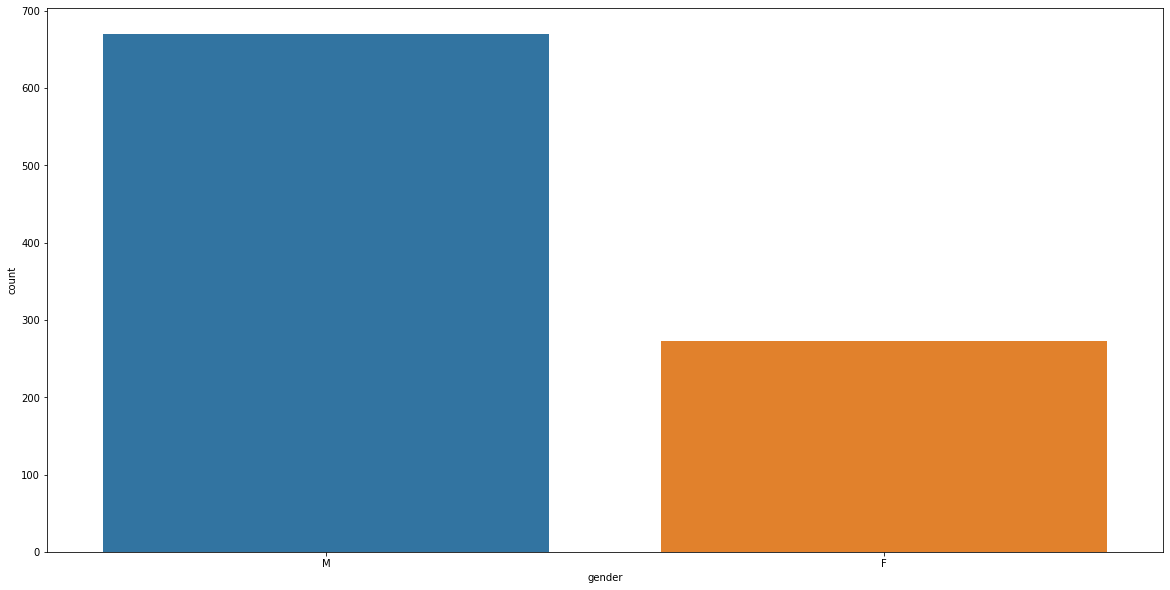

In [286]:
#Gender
sns.countplot(users.gender);

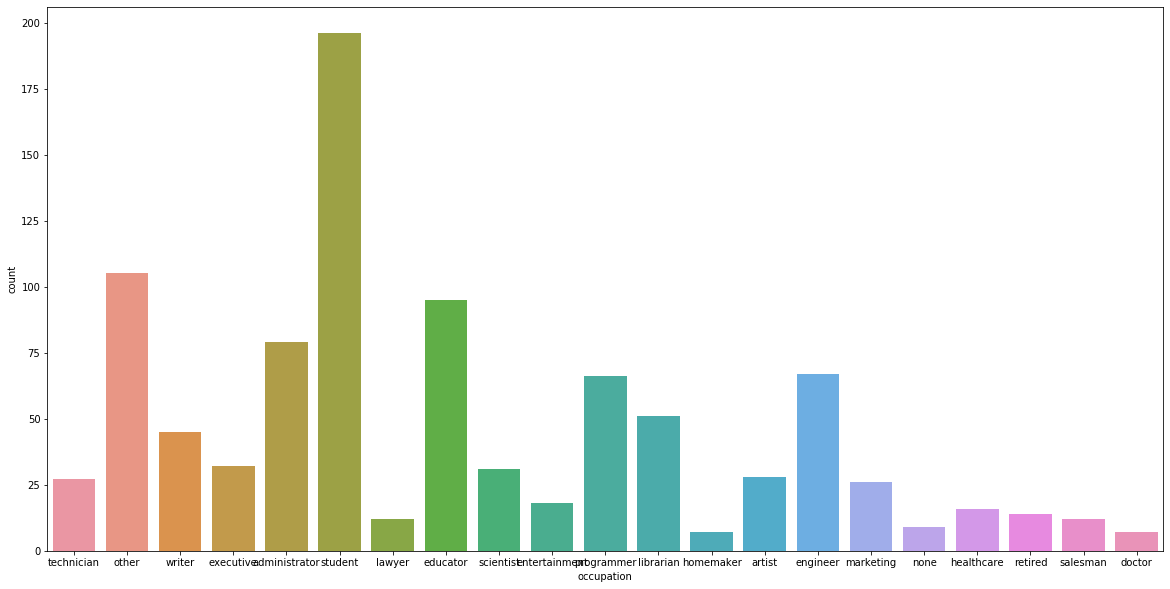

In [287]:
#Occupation
sns.countplot(users.occupation);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [288]:
#Your answer here

#Create dataframe to hold sum of genres grouped by release year
movies['release year'] = movies['release date'].str.split('-', expand = True)[2].astype(int)

features = [col for col in movies.columns if col != 'movie id']
popularity = movies[features].groupby('release year').sum()

popularity

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


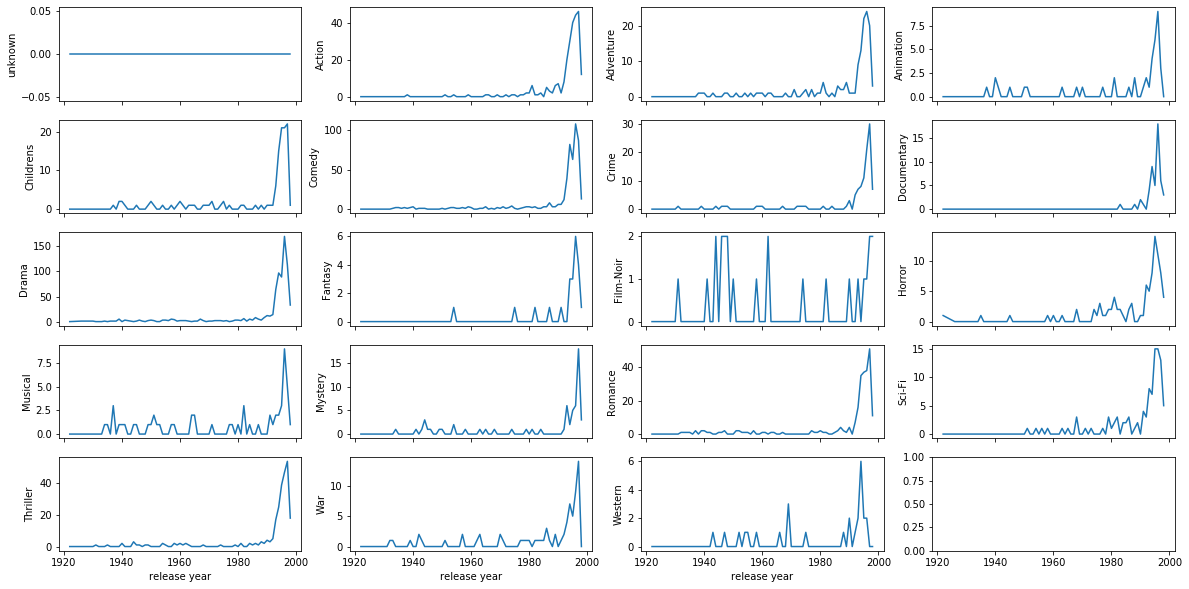

In [289]:
#Create univariate plots for all the columns

fig, axs = plt.subplots(nrows = 5, ncols = 4, sharex = True)

colIndex = 0 
for col in popularity.columns:
  sns.lineplot(data = popularity, 
               x = popularity.index, 
               y = col, 
               ax = axs[math.floor(colIndex/4)][colIndex % 4]);
  colIndex += 1

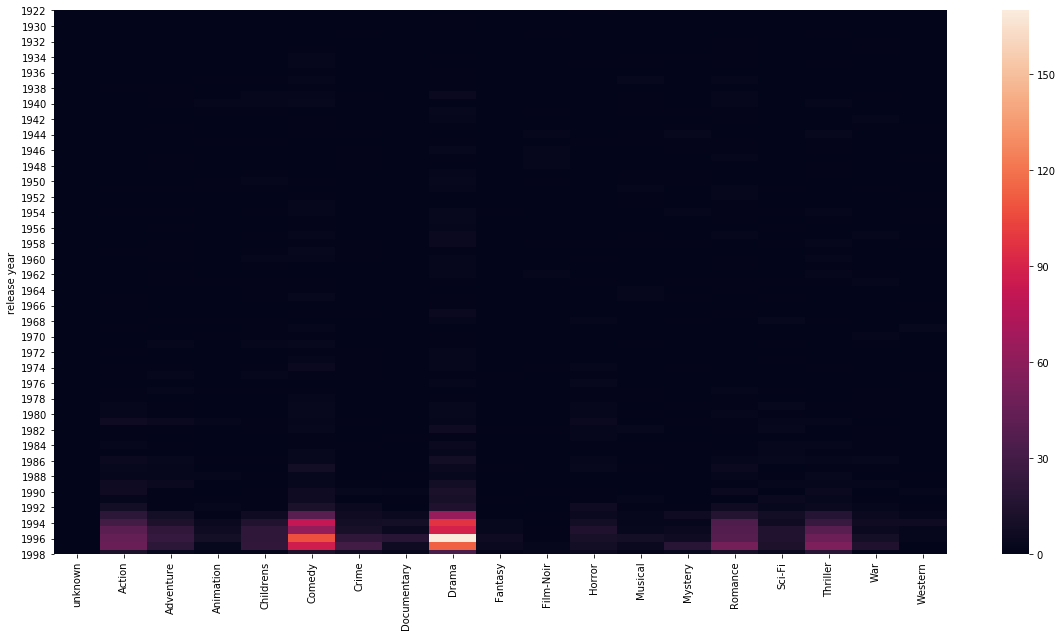

In [28]:
#Create heatmap with the entire dataframe
sns.heatmap(popularity);

### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [292]:
#your answer here

# Get list of movies having more than 100 ratings
df = ratings.groupby('movie id').count()
maxRatedMoviesList = pd.merge(
                        df[df['rating'] > 100], 
                        movies, 
                        how = 'inner', 
                        on = 'movie id')['movie title'].tolist()
maxRatedMoviesList

['Toy Story ',
 'GoldenEye ',
 'Get Shorty ',
 'Twelve Monkeys ',
 'Babe ',
 'Dead Man Walking ',
 'Seven (Se7en) ',
 'Usual Suspects, The ',
 'Mighty Aphrodite ',
 'Postino, Il ',
 "Mr. Holland's Opus ",
 'Braveheart ',
 'Taxi Driver ',
 'Rumble in the Bronx ',
 'Birdcage, The ',
 'Apollo 13 ',
 'Batman Forever ',
 'Crimson Tide ',
 'Net, The ',
 'Clerks ',
 'Ed Wood ',
 'Hoop Dreams ',
 'Star Wars ',
 'Natural Born Killers ',
 'Outbreak ',
 'Professional, The ',
 'Pulp Fiction ',
 'Quiz Show ',
 'Stargate ',
 'Shawshank Redemption, The ',
 "What's Eating Gilbert Grape ",
 'While You Were Sleeping ',
 'Ace Ventura: Pet Detective ',
 'Crow, The ',
 'Forrest Gump ',
 'Four Weddings and a Funeral ',
 'Lion King, The ',
 'Mask, The ',
 'Maverick ',
 'Firm, The ',
 'Fugitive, The ',
 'Hudsucker Proxy, The ',
 'Jurassic Park ',
 'Much Ado About Nothing ',
 'Remains of the Day, The ',
 'Searching for Bobby Fischer ',
 'Sleepless in Seattle ',
 'Blade Runner ',
 'Nightmare Before Christmas, T

In [293]:
# Get average rating for all movies

movieRatings = pd.merge(
                    movies, 
                    ratings, 
                    how = 'inner', 
                    on = 'movie id')[['movie title', 'rating']]

movieRatings = movieRatings.groupby('movie title').mean().sort_values(
                    by = 'rating', ascending = False).reset_index()

movieRatings.rename(columns={'rating':'avg rating'}, inplace = True)
movieRatings

,movie title,avg rating
0,"Great Day in Harlem, A",5.0
1,Prefontaine,5.0
2,Someone Else's America,5.0
3,Entertaining Angels: The Dorothy Day Story,5.0
4,Marlene Dietrich: Shadow and Light (,5.0
...,...,...
1652,Babyfever,1.0
1653,Lashou shentan,1.0
1654,Shadows (Cienie),1.0
1655,Shadow of Angels (Schatten der Engel),1.0


In [294]:
# Get top 25(highest avg rating) movies each having a minimum 100 ratings

movieRatings[movieRatings['movie title'].isin(maxRatedMoviesList)].head(25)

,movie title,avg rating
15,"Close Shave, A",4.491071
16,Schindler's List,4.466443
17,"Wrong Trousers, The",4.466102
18,Casablanca,4.456790
20,"Shawshank Redemption, The",4.445230
21,Rear Window,4.387560
22,"Usual Suspects, The",4.385768
23,Star Wars,4.358491
24,12 Angry Men,4.344000
28,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



Men watch more drama than women
* False. Only 38.9% men watch Drama compared to 42.7% women.


Women watch more Sci-Fi than men
* False. Only 10.2% women watch Sci-Fi compared to 13.6% men.


Men watch more Romance than women
* False. Only 18.3% men watch Romance compared to 22.7% women.


In [295]:
# Detailed analysis for the above conclusion:

# Merge users and ratings
userRatings = ratings.merge(users, how = 'inner', on = 'user id')
userRatings = userRatings[['user id', 'gender', 'rating', 'movie id']]
userRatings

,user id,gender,rating,movie id
0,196,M,3,242
1,196,M,4,393
2,196,M,4,381
3,196,M,3,251
4,196,M,5,655
...,...,...,...,...
99995,941,M,5,919
99996,941,M,3,273
99997,941,M,5,1
99998,941,M,4,294


In [296]:
# Merge userRatings and movies to get a dataframe having gender, ratings and movie genres
userMovieRatings = userRatings.merge(
                                movies,
                                how = 'inner',
                                on = 'movie id')

featuresToDrop = ['user id', 'movie id', 'movie title', 'release date', 'release year']
features = [col for col in userMovieRatings.columns if col in featuresToDrop]
userMovieRatings.drop(features, axis = 1, inplace = True)
userMovieRatings

,gender,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,M,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,M,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,M,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,M,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
99986,M,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99987,M,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
99988,M,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
# Get ratings by gender for the various genre
ratingsByGender = userMovieRatings.groupby('gender').sum()
ratingsByGender

,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,
F,90894,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,262060,0,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [298]:
# Get ratings in percentage by gender for the various genre

numOfMaleRaters = userMovieRatings[userMovieRatings['gender'] == 'M'].shape[0]
numOfFeMaleRaters = userMovieRatings[userMovieRatings['gender'] == 'F'].shape[0]

ratingsByGender.iloc[0] = ratingsByGender.iloc[0].div(femaleRatersCount).mul(100)
ratingsByGender.iloc[1] = ratingsByGender.iloc[1].div(maleRatersCount).mul(100)
ratingsByGender

,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,,
F,353.123543,0.0,21.142191,12.202797,3.865579,8.671329,31.344211,6.969697,0.726496,42.766123,1.410256,1.495726,4.650350,5.602176,5.104895,22.758353,10.213675,19.759130,8.504274,1.441336
M,352.895233,0.0,27.130353,14.290331,3.514678,6.665769,29.307837,8.431188,0.768920,38.899811,1.331807,1.815244,5.548074,4.729329,5.293563,18.318072,13.602208,22.604363,9.707783,1.997037


From the data above, we can now validate the following statements:
    
Men watch more drama than women
* False. Only 38.9% men watch Drama compared to 42.7% women.

Women watch more Sci-Fi than men
* False. Only 10.2% women watch Sci-Fi compared to 13.6% men.

Men watch more Romance than women
* False. Only 18.3% men watch Romance compared to 22.7% women.